In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-09-20 14:10:12.370316


In [2]:
!pwd

/content


In [4]:
!git clone https://github.com/vigneshbabupj/EVA5.git

Cloning into 'EVA5'...
remote: Enumerating objects: 134, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 134 (delta 61), reused 52 (delta 15), pack-reused 0
Receiving objects: 100% (134/134), 2.08 MiB | 12.62 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [3]:
# %cd EVA5/
# !git pull

[Errno 2] No such file or directory: 'EVA5/'
/content
fatal: not a git repository (or any of the parent directories): .git


In [5]:
%cd EVA5/Q9/
#%cd Q9/


/content/EVA5/Q9


In [6]:
from eva_data_loader import CIFAR10_dataloader
from eva_train import train
from eva_test import test
from  eva_utils import incorrect_images
import eva_regularization as rg

In [7]:
# load model
from quizdnn import quizdnn

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.optim as optim

In [9]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.backends.cudnn.benchmark = True

seed=121

torch.manual_seed(seed)

print("Using Cuda : ", use_cuda)


Using Cuda :  True


In [10]:
Batch_Size = 128

train_loader,test_loader, classes = CIFAR10_dataloader(Batch_Size, use_cuda)

Extracting /data/cifar-10-python.tar.gz to /data/
Files already downloaded and verified


In [11]:
from torchsummary import summary

model = quizdnn().to(device)

summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]              96
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4           [-1, 32, 32, 32]             864
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 32, 32, 32]           9,216
              ReLU-8           [-1, 32, 32, 32]               0
       BatchNorm2d-9           [-1, 32, 32, 32]              64
        MaxPool2d-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]           2,048
             ReLU-12           [-1, 64, 16, 16]               0
      BatchNorm2d-13           [-1, 64, 16, 16]             128
           Conv2d-14           [-1, 64,

In [12]:
model = quizdnn().to(device)

lambda_l1 = 0
lambda_l2 = 0

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=lambda_l2)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

EPOCHS = 39
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_loss = train(model, device, train_loader, optimizer, lambda_l1,criterion)
    train_losses.append(train_loss)
    train_accuracy.append(train_acc)

    #scheduler.step()
    test_acc, test_loss = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracy.append(test_acc)

#model_file = 'models/'+versions+'.pth'
#torch.save(model.state_dict(), model_file)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train: Batch id: 390 	Loss: 0.995299	 Accuracy:54.050: 100%|██████████| 391/391 [00:17<00:00, 22.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.008191, Accuracy: 6300/10000 (63.000%)

EPOCH: 1


Train: Batch id: 390 	Loss: 0.649225	 Accuracy:69.442: 100%|██████████| 391/391 [00:17<00:00, 22.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.006637, Accuracy: 7039/10000 (70.390%)

EPOCH: 2


Train: Batch id: 390 	Loss: 0.592905	 Accuracy:76.286: 100%|██████████| 391/391 [00:17<00:00, 22.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005316, Accuracy: 7663/10000 (76.630%)

EPOCH: 3


Train: Batch id: 390 	Loss: 0.578647	 Accuracy:80.326: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004708, Accuracy: 7951/10000 (79.510%)

EPOCH: 4


Train: Batch id: 390 	Loss: 0.363864	 Accuracy:82.696: 100%|██████████| 391/391 [00:17<00:00, 23.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004542, Accuracy: 7973/10000 (79.730%)

EPOCH: 5


Train: Batch id: 390 	Loss: 0.340955	 Accuracy:84.846: 100%|██████████| 391/391 [00:16<00:00, 23.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004319, Accuracy: 8175/10000 (81.750%)

EPOCH: 6


Train: Batch id: 390 	Loss: 0.269178	 Accuracy:86.306: 100%|██████████| 391/391 [00:16<00:00, 23.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004058, Accuracy: 8259/10000 (82.590%)

EPOCH: 7


Train: Batch id: 390 	Loss: 0.230194	 Accuracy:87.852: 100%|██████████| 391/391 [00:16<00:00, 23.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004023, Accuracy: 8263/10000 (82.630%)

EPOCH: 8


Train: Batch id: 390 	Loss: 0.438583	 Accuracy:89.060: 100%|██████████| 391/391 [00:17<00:00, 22.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003836, Accuracy: 8370/10000 (83.700%)

EPOCH: 9


Train: Batch id: 390 	Loss: 0.182371	 Accuracy:90.082: 100%|██████████| 391/391 [00:16<00:00, 23.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004007, Accuracy: 8304/10000 (83.040%)

EPOCH: 10


Train: Batch id: 390 	Loss: 0.243721	 Accuracy:91.082: 100%|██████████| 391/391 [00:17<00:00, 22.89it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003889, Accuracy: 8370/10000 (83.700%)

EPOCH: 11


Train: Batch id: 390 	Loss: 0.241199	 Accuracy:92.246: 100%|██████████| 391/391 [00:16<00:00, 23.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003882, Accuracy: 8421/10000 (84.210%)

EPOCH: 12


Train: Batch id: 390 	Loss: 0.171147	 Accuracy:92.924: 100%|██████████| 391/391 [00:16<00:00, 23.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.003946, Accuracy: 8388/10000 (83.880%)

EPOCH: 13


Train: Batch id: 390 	Loss: 0.227686	 Accuracy:93.798: 100%|██████████| 391/391 [00:17<00:00, 22.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004092, Accuracy: 8390/10000 (83.900%)

EPOCH: 14


Train: Batch id: 390 	Loss: 0.184743	 Accuracy:94.230: 100%|██████████| 391/391 [00:17<00:00, 22.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004043, Accuracy: 8436/10000 (84.360%)

EPOCH: 15


Train: Batch id: 390 	Loss: 0.150538	 Accuracy:94.882: 100%|██████████| 391/391 [00:16<00:00, 23.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004051, Accuracy: 8474/10000 (84.740%)

EPOCH: 16


Train: Batch id: 390 	Loss: 0.180259	 Accuracy:95.628: 100%|██████████| 391/391 [00:16<00:00, 23.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004169, Accuracy: 8423/10000 (84.230%)

EPOCH: 17


Train: Batch id: 390 	Loss: 0.052425	 Accuracy:96.328: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004117, Accuracy: 8499/10000 (84.990%)

EPOCH: 18


Train: Batch id: 390 	Loss: 0.092579	 Accuracy:96.684: 100%|██████████| 391/391 [00:17<00:00, 22.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004236, Accuracy: 8502/10000 (85.020%)

EPOCH: 19


Train: Batch id: 390 	Loss: 0.103691	 Accuracy:96.902: 100%|██████████| 391/391 [00:16<00:00, 23.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004295, Accuracy: 8477/10000 (84.770%)

EPOCH: 20


Train: Batch id: 390 	Loss: 0.087074	 Accuracy:97.258: 100%|██████████| 391/391 [00:16<00:00, 23.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004251, Accuracy: 8519/10000 (85.190%)

EPOCH: 21


Train: Batch id: 390 	Loss: 0.052974	 Accuracy:97.722: 100%|██████████| 391/391 [00:17<00:00, 22.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004390, Accuracy: 8543/10000 (85.430%)

EPOCH: 22


Train: Batch id: 390 	Loss: 0.094063	 Accuracy:97.766: 100%|██████████| 391/391 [00:16<00:00, 23.49it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004557, Accuracy: 8526/10000 (85.260%)

EPOCH: 23


Train: Batch id: 390 	Loss: 0.054012	 Accuracy:98.112: 100%|██████████| 391/391 [00:16<00:00, 23.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004393, Accuracy: 8544/10000 (85.440%)

EPOCH: 24


Train: Batch id: 390 	Loss: 0.101085	 Accuracy:98.280: 100%|██████████| 391/391 [00:16<00:00, 23.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004693, Accuracy: 8512/10000 (85.120%)

EPOCH: 25


Train: Batch id: 390 	Loss: 0.038954	 Accuracy:98.618: 100%|██████████| 391/391 [00:16<00:00, 23.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004685, Accuracy: 8505/10000 (85.050%)

EPOCH: 26


Train: Batch id: 390 	Loss: 0.027738	 Accuracy:98.516: 100%|██████████| 391/391 [00:16<00:00, 23.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004733, Accuracy: 8519/10000 (85.190%)

EPOCH: 27


Train: Batch id: 390 	Loss: 0.052195	 Accuracy:98.834: 100%|██████████| 391/391 [00:16<00:00, 23.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005005, Accuracy: 8512/10000 (85.120%)

EPOCH: 28


Train: Batch id: 390 	Loss: 0.022816	 Accuracy:99.076: 100%|██████████| 391/391 [00:16<00:00, 23.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004816, Accuracy: 8537/10000 (85.370%)

EPOCH: 29


Train: Batch id: 390 	Loss: 0.009915	 Accuracy:99.200: 100%|██████████| 391/391 [00:16<00:00, 23.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004885, Accuracy: 8548/10000 (85.480%)

EPOCH: 30


Train: Batch id: 390 	Loss: 0.028179	 Accuracy:99.108: 100%|██████████| 391/391 [00:16<00:00, 23.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.004855, Accuracy: 8572/10000 (85.720%)

EPOCH: 31


Train: Batch id: 390 	Loss: 0.031340	 Accuracy:99.226: 100%|██████████| 391/391 [00:16<00:00, 23.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005071, Accuracy: 8537/10000 (85.370%)

EPOCH: 32


Train: Batch id: 390 	Loss: 0.023333	 Accuracy:99.146: 100%|██████████| 391/391 [00:16<00:00, 23.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005205, Accuracy: 8499/10000 (84.990%)

EPOCH: 33


Train: Batch id: 390 	Loss: 0.030791	 Accuracy:99.410: 100%|██████████| 391/391 [00:16<00:00, 23.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005029, Accuracy: 8558/10000 (85.580%)

EPOCH: 34


Train: Batch id: 390 	Loss: 0.012394	 Accuracy:99.450: 100%|██████████| 391/391 [00:17<00:00, 22.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005062, Accuracy: 8614/10000 (86.140%)

EPOCH: 35


Train: Batch id: 390 	Loss: 0.003477	 Accuracy:99.514: 100%|██████████| 391/391 [00:17<00:00, 22.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005185, Accuracy: 8574/10000 (85.740%)

EPOCH: 36


Train: Batch id: 390 	Loss: 0.011816	 Accuracy:99.580: 100%|██████████| 391/391 [00:16<00:00, 23.39it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005178, Accuracy: 8564/10000 (85.640%)

EPOCH: 37


Train: Batch id: 390 	Loss: 0.022901	 Accuracy:99.658: 100%|██████████| 391/391 [00:16<00:00, 23.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: loss: 0.005291, Accuracy: 8555/10000 (85.550%)

EPOCH: 38


Train: Batch id: 390 	Loss: 0.008596	 Accuracy:99.712: 100%|██████████| 391/391 [00:16<00:00, 23.20it/s]



Test set: loss: 0.005205, Accuracy: 8589/10000 (85.890%)



/content/EVA5/Q9/eva_utils.py:55: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idxs_mask = (pred.eq(target.data.view_as(pred))==False).nonzero() ## store incorrect images
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] 

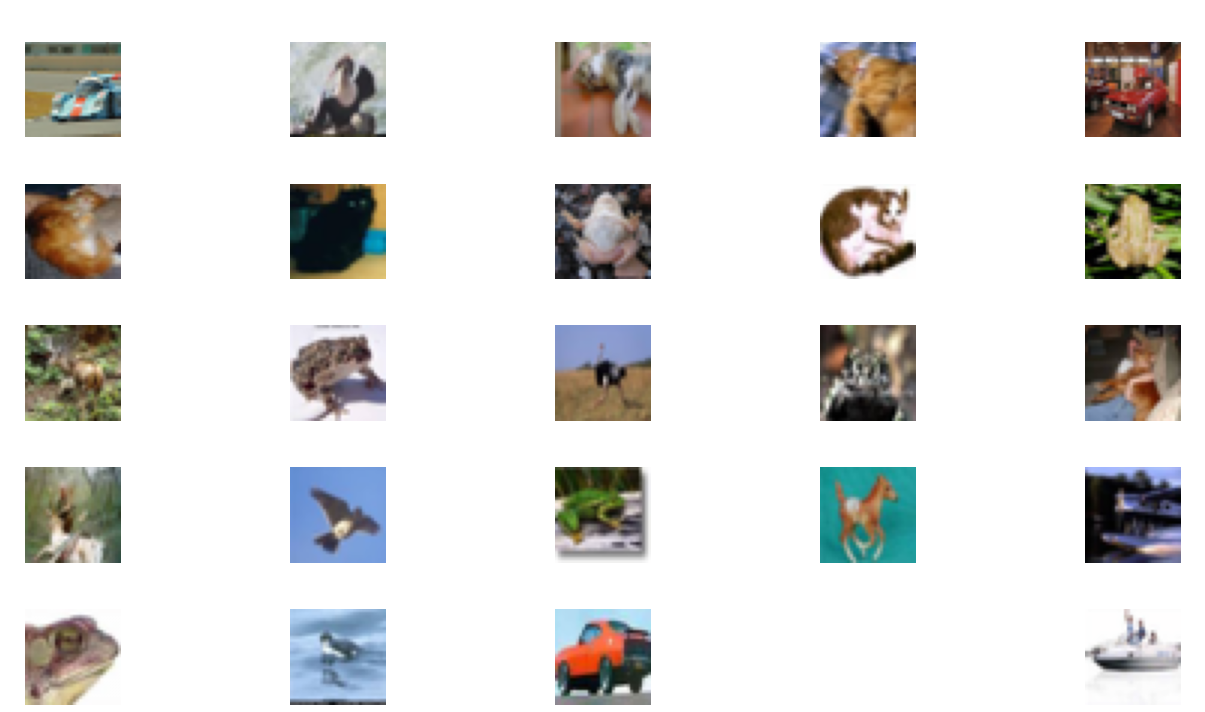

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

incorrect = incorrect_images(model, device, test_loader)
incorrect_examples = incorrect['images']
incorrect_pred = incorrect['Pred']
incorrect_target = incorrect['target']

inv_normalize = transforms.Normalize(
  mean=[-0.4890062/0.264582, -0.47970363/0.258996, -0.47680542/0.25643882],
  std=[1/0.264582, 1/0.258996, 1/0.25643882]
)


fig = plt.figure(figsize=(20,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  #plt.tight_layout(pad=0, w_pad=0, h_pad=0.4)
  #incorrect_examples_inv = inv_normalize(incorrect_examples[i])
  

  incorrect_examples_temp = inv_normalize(incorrect_examples[i])
  incorrect_examples_temp = incorrect_examples_temp.cpu().numpy()

  plt.imshow(np.transpose(incorrect_examples_temp, (1, 2, 0)).squeeze())
  plt.title(f"Predicted:{classes[incorrect_pred[i]]} \n Target:{classes[incorrect_target[i]]}",color='white',fontsize=16)
  plt.axis('off')
  plt.tight_layout() 
  

#plt.savefig('/content/drive/My Drive/models/incorrect_images.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 97 %
Accuracy of   car : 96 %
Accuracy of  bird : 88 %
Accuracy of   cat : 73 %
Accuracy of  deer : 82 %
Accuracy of   dog : 63 %
Accuracy of  frog : 91 %
Accuracy of horse : 88 %
Accuracy of  ship : 90 %
Accuracy of truck : 85 %
